<a href="https://colab.research.google.com/github/Nurwidi130603/Learn-ML-Education-Career-Succsees/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Nurwidi%20Bagus%20Amiryunanto_(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


## **Education & Career Success**

Dataset ini mengumpulkan berbagai informasi yang bertujuan untuk memahami, menganalisis, dan memprediksi tingkat depresi di kalangan siswa. Dataset ini dirancang untuk penelitian dalam bidang **psikologi, data sains, dan pendidikan**, memberikan wawasan tentang faktor-faktor yang berkontribusi terhadap tantangan kesehatan mental siswa serta membantu dalam merancang strategi intervensi dini.

Dataset terdiri dari 27900 rows dengan 18 features.

### **Tujuan Machine Learning**
Memahami korelasi antara tekanan akademik terhadap isu mental health, sekaligus membangun model prediksi untuk mengidentifikasi resiko mental health siswa berdasarkan beberapa indikator.

# **2. Import Library**

In [4]:
# Import library
import numpy as np  # Mengimpor library numpy untuk komputasi numerik
import pandas as pd  # Mengimpor library pandas untuk analisis data frame
import seaborn as sns  # Mengimpor library seaborn untuk visualisasi data
import matplotlib.pyplot as plt  # Mengimpor library matplotlib untuk visualisasi data

from sklearn.model_selection import train_test_split  # Mengimpor fungsi train_test_split dari library scikit-learn untuk membagi data menjadi data latih dan data uji
from sklearn.neighbors import KNeighborsClassifier  # Mengimpor kelas KNeighborsClassifier dari library scikit-learn untuk model klasifikasi dengan metode K-Nearest Neighbors
from sklearn.preprocessing import LabelEncoder  # Mengimpor kelas LabelEncoder dari library scikit-learn untuk melakukan encoding data kolom
from sklearn.preprocessing import MinMaxScaler  # Mengimpor kelas MinMaxScaler dari library scikit-learn untuk melakukan penskalaan fitur
from sklearn.metrics import accuracy_score  # Mengimpor fungsi accuracy_score dari library scikit-learn untuk mengukur akurasi model

# Set the maximum column width
pd.set_option('display.max_colwidth', 100)  # Mengatur lebar maksimum kolom saat menampilkan data frame menggunakan library pandas
# Magic function to display plots in notebook
%matplotlib inline
# Mengaktifkan fungsi untuk menampilkan plot di dalam notebook Jupyter

# **3. Memuat Dataset**

In [6]:
url='https://github.com/Nurwidi130603/Learn-ML-Education-Career-Succsees/blob/main/Dataset_inisiasi.csv/?raw=True'
edu_df = pd.read_csv(url)

In [7]:
edu_df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
edu_df.describe() # Menggunakan metode 'describe()' dari DataFrame 'edu_df' untuk menghasilkan ringkasan statistik dari dataset.

In [ ]:
# Calculate missing values in all columns
# Menggunakan metode 'isnull()' dari DataFrame 'edu_df' untuk mengidentifikasi nilai yang hilang (missing values)
# dalam dataset, kemudian metode 'sum()' digunakan untuk menghitung jumlah nilai yang hilang dalam setiap kolom.
edu_df.isnull().sum()

### *Insight*

Data terbaca dan tidak ditemukan diperlukan lagi proses data cleaning, karena terlihat sudah bersih. Selanjutnya akan dilakukan proses EDA melalui beberapa visualisasi dasar yang menggambarkan data secara deskriptif.

# **4. Exploratory Data Analysis (EDA)**
Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. **Memahami Struktur Data**

In [ ]:
print(f'Number of features: {edu_df.shape[1]}')
# Mencetak jumlah fitur (kolom) dalam dataset dengan menggunakan atribut 'shape[1]' dari DataFrame 'edu_df'. Format string (f-string) digunakan untuk memasukkan nilai tersebut ke dalam teks yang akan dicetak.

print(f'Number of observations: {edu_df.shape[0]}')
# Mencetak jumlah observasi (baris) dalam dataset dengan menggunakan atribut 'shape[0]' dari DataFrame 'edu_df'. Format string (f-string) digunakan untuk memasukkan nilai tersebut ke dalam teks yang akan dicetak.

In [ ]:
# Check data types of the features
# Menggunakan atribut 'dtypes' dari DataFrame 'heart_df' untuk menampilkan tipe data dari setiap fitur dalam dataset.
edu_df.dtypes

2. **Analisis Distribusi dan Korelasi**

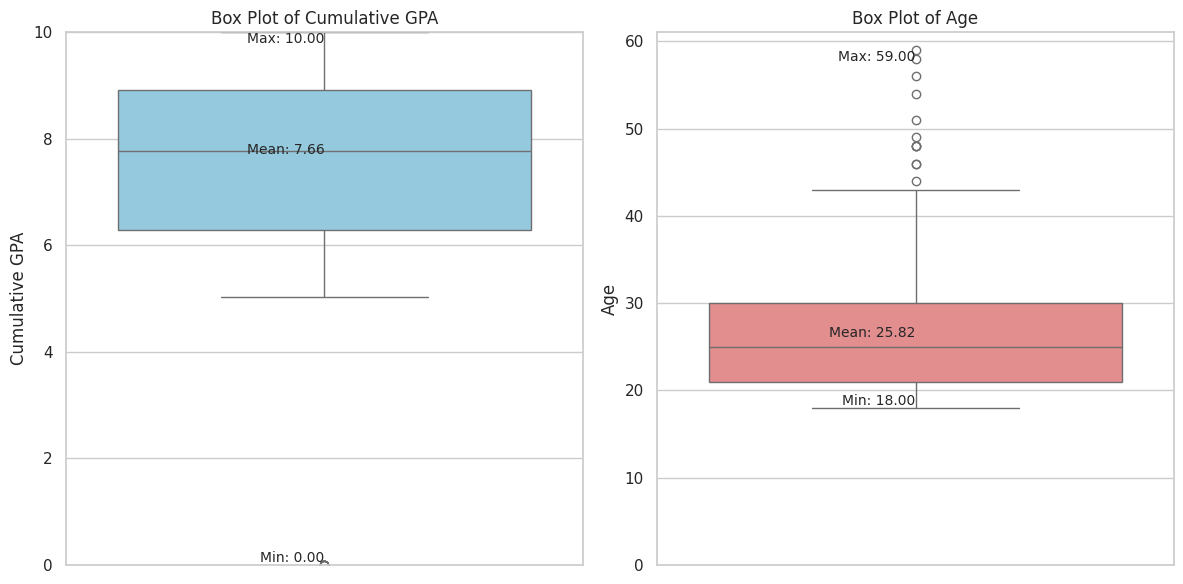

In [9]:
# Set plot style
sns.set(style="whitegrid")

# Create separate box plots for University GPA and Starting Salary
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for University GPA
sns.boxplot(y=edu_df["CGPA"], ax=axes[0], color="skyblue")
gpa_min = edu_df['CGPA'].min()
gpa_max = edu_df['CGPA'].max()
gpa_mean = edu_df['CGPA'].mean()
axes[0].text(0, gpa_min, f"Min: {gpa_min:.2f}", ha='right', va='bottom', fontsize=10)
axes[0].text(0, gpa_max, f"Max: {gpa_max:.2f}", ha='right', va='top', fontsize=10)
axes[0].text(0, gpa_mean, f"Mean: {gpa_mean:.2f}", ha='right', va='bottom', fontsize=10)
axes[0].set_title("Box Plot of Cumulative GPA")
axes[0].set_ylabel("Cumulative GPA")
axes[0].set_ylim(0,10)

# Box plot for Starting Salary
sns.boxplot(y=edu_df["Age"], ax=axes[1], color="lightcoral")
age_min = edu_df['Age'].min()
age_max = edu_df['Age'].max()
age_mean = edu_df['Age'].mean()
axes[1].text(0, age_min, f"Min: {age_min:.2f}", ha='right', va='bottom', fontsize=10)
axes[1].text(0, age_max, f"Max: {age_max:.2f}", ha='right', va='top', fontsize=10)
axes[1].text(0, age_mean, f"Mean: {age_mean:.2f}", ha='right', va='bottom', fontsize=10)
axes[1].set_title("Box Plot of Age")
axes[1].set_ylabel("Age")
axes[1].set_ylim(0)

# Show plots
plt.tight_layout()
plt.show()

3. **Visualisasi Data**  

In [ ]:
# Create a list of categorical columns
# Membuat daftar (list) yang berisi nama-nama kolom kategorikal/features dalam dataset.
cat_cols = ['Gender', 'Field_of_Study', 'Internships_Completed', 'Projects_Completed', 'Certifications','Soft_Skills_Score','Job_Offers','Career_Satisfaction','Years_to_Promotion','Current_Job_Level','Work_Life_Balance','Entrepreneurship']

# Define number of rows and columns for the subplots
# Menentukan jumlah baris (num_rows) dan kolom (num_cols) untuk subplot yang akan dibuat.
# Angka ini akan mempengaruhi tata letak subplot pada visualisasi berikutnya.
num_rows = 6
num_cols = 2

# Set up the subplots
# Membuat objek subplot dengan menggunakan fungsi 'subplots()' dari library matplotlib.pyplot.
# Jumlah baris (num_rows) dan kolom (num_cols) ditentukan sebelumnya. Juga, ukuran gambar (figsize) ditentukan sebagai (20, 18).
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20,18))

# Loop over each categorical column to create a bar plot
for i, col in enumerate(cat_cols): # Calculate the row and column index for the current subplot
    row_idx = i // num_cols
    col_idx = i % num_cols # Menghitung indeks baris (row_idx) dan kolom (col_idx) untuk subplot saat ini menggunakan operasi pembagian dan modulo.

    # Count the number of rows for each category in the column (frequency distribution)
    counts = edu_df[col].value_counts()
# Menghitung jumlah baris untuk setiap kategori dalam kolom saat ini dengan menggunakan metode 'value_counts()' dari DataFrame 'edu_df'.

    # Create a bar plot of the counts in the current subplot
    ax = counts.plot(kind='bar', rot=0, color='#1f77b4', ax=axes[row_idx, col_idx])
# Membuat visualisasi diagram batang (bar plot) untuk distribusi frekuensi (counts) dalam subplot saat ini.
# Tipe plot diatur sebagai 'bar', rotasi label sumbu x (rot) diatur sebagai 0, warna batang diatur sebagai '#1f77b4',
# dan objek subplot yang ditentukan berdasarkan indeks baris dan kolom.

    # Add labels for the x and y axes
    ax.set_xlabel(col, size=12)
    ax.set_ylabel('Count', size=12)
# Menambahkan label pada sumbu x dan y untuk subplot saat ini.

    # Add a title for the plot
    ax.set_title(f'Count of {col}', size=16)
# Menambahkan judul pada plot untuk subplot saat ini menggunakan format string (f-string) yang mencantumkan nama kolom.

    # Add data labels to the bars
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')
# Menambahkan label data pada batang diagram menggunakan metode 'bar_label()' dari objek subplot.

# If there are not enough columns to fill in the last row, create a blank plot
if len(cat_cols) % num_cols != 0:
    blank_ax = axes[num_rows-1, num_cols-1]
    blank_ax.axis('off')
# Jika tidak ada cukup kolom untuk mengisi baris terakhir pada subplot, maka akan dibuat sebuah subplot kosong (blank plot) untuk mengisi ruang yang tersisa.
# Hal ini dilakukan dengan memeriksa sisa hasil bagi dari pembagian jumlah kolom dengan num_cols. Jika sisa hasil bagi tidak sama dengan 0,
# maka sebuah subplot kosong akan dibuat dengan menggunakan objek subplot pada indeks [num_rows-1, num_cols-1] dan disetel agar tidak terlihat dengan menggunakan metode 'axis("off")'.

# Adjust the spacing between subplots
fig.tight_layout()
# Menyesuaikan jarak antara subplot agar tata letaknya lebih rapi dan sesuai dengan ukuran gambar yang ditentukan sebelumnya.

plt.show()
# Menampilkan plot keseluruhan.

### *Insight*

Dari hasil Exploratory Data Analysis (EDA) yang dilakukan. Kita dapat menarik hipotesis sementara dan pemahaman umum tentang fitur-fitur tersebut. Berdasarkan data pengolahan EDA ditemukan bahwa data yang dikumpulkan memiliki distribusi yang normal di beberapa fiturnya. Hanya ditemukan beberapa outliers yang tidak begitu jauh dari nilai Interquartilnya.

Untuk proses clustering ini, kita membutuhkan kombinasi fitur numerik dan kategorikal. Beberapa fitur potensial dari dataset ini yang dapat digunakan adalah:

1. Fitur Numerik:
  - GPA (Nilai akademik siswa)
  - Years of Experience (Jumlah tahun pengalaman kerja)
  - Salary (Gaji saat ini atau awal)
  - Internship Completed (Jumlah berapa kali magang)
  - Networking Score (Seberapa aktif dalam membangun jaringan profesional)

2. Fitur Kategorikal (diubah menjadi numerik menggunakan Label Encoder):
  - Field of Study (Bidang studi yang diambil)
  - Job Industry (Industri pekerjaan yang dimasuki)




# **5. Data Preprocessing**

1. **Mendeteksi Data Duplikat**  

In [ ]:
# Mengidentifikasi baris duplikat
duplicates = edu_df.duplicated()

print("Baris duplikat:")
print(edu_df[duplicates])


3. **Menghapus Data Rows Selain Siswa**  

In [ ]:
edu_df = edu_df[edu_df["Profession"] == 'Student'] # Menghapus data row selain siswa

2. **Encoding Data**  

In [ ]:
# Mengidentifikasi kolom kategorial
category_features = edu_df.select_dtypes(include=['object']).columns
edu_df[category_features]

In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical features
for col in category_features:
    edu_df[col] = label_encoder.fit_transform(edu_df[col])

In [ ]:
edu_df.info()

### *Insight*

Dikarenakan dataset yang digunakan termasuk dalam tipe dataset yang terdistribusi normal dan tidak ada missing value maka, kita hanya mengecek apakah data memiliki duplikasi dan merubah kolom kategorial menjadi numerik untuk nantinya mempermudah clustering dan menghapus baris yang memiliki nilai profesi bukan siswa.

# **6. Pembangunan Model Clustering**

## **a. Feature Selection (Opsional)**

1. **Melihat Korelasi Antar Fitur Menggunakan Pearson**  

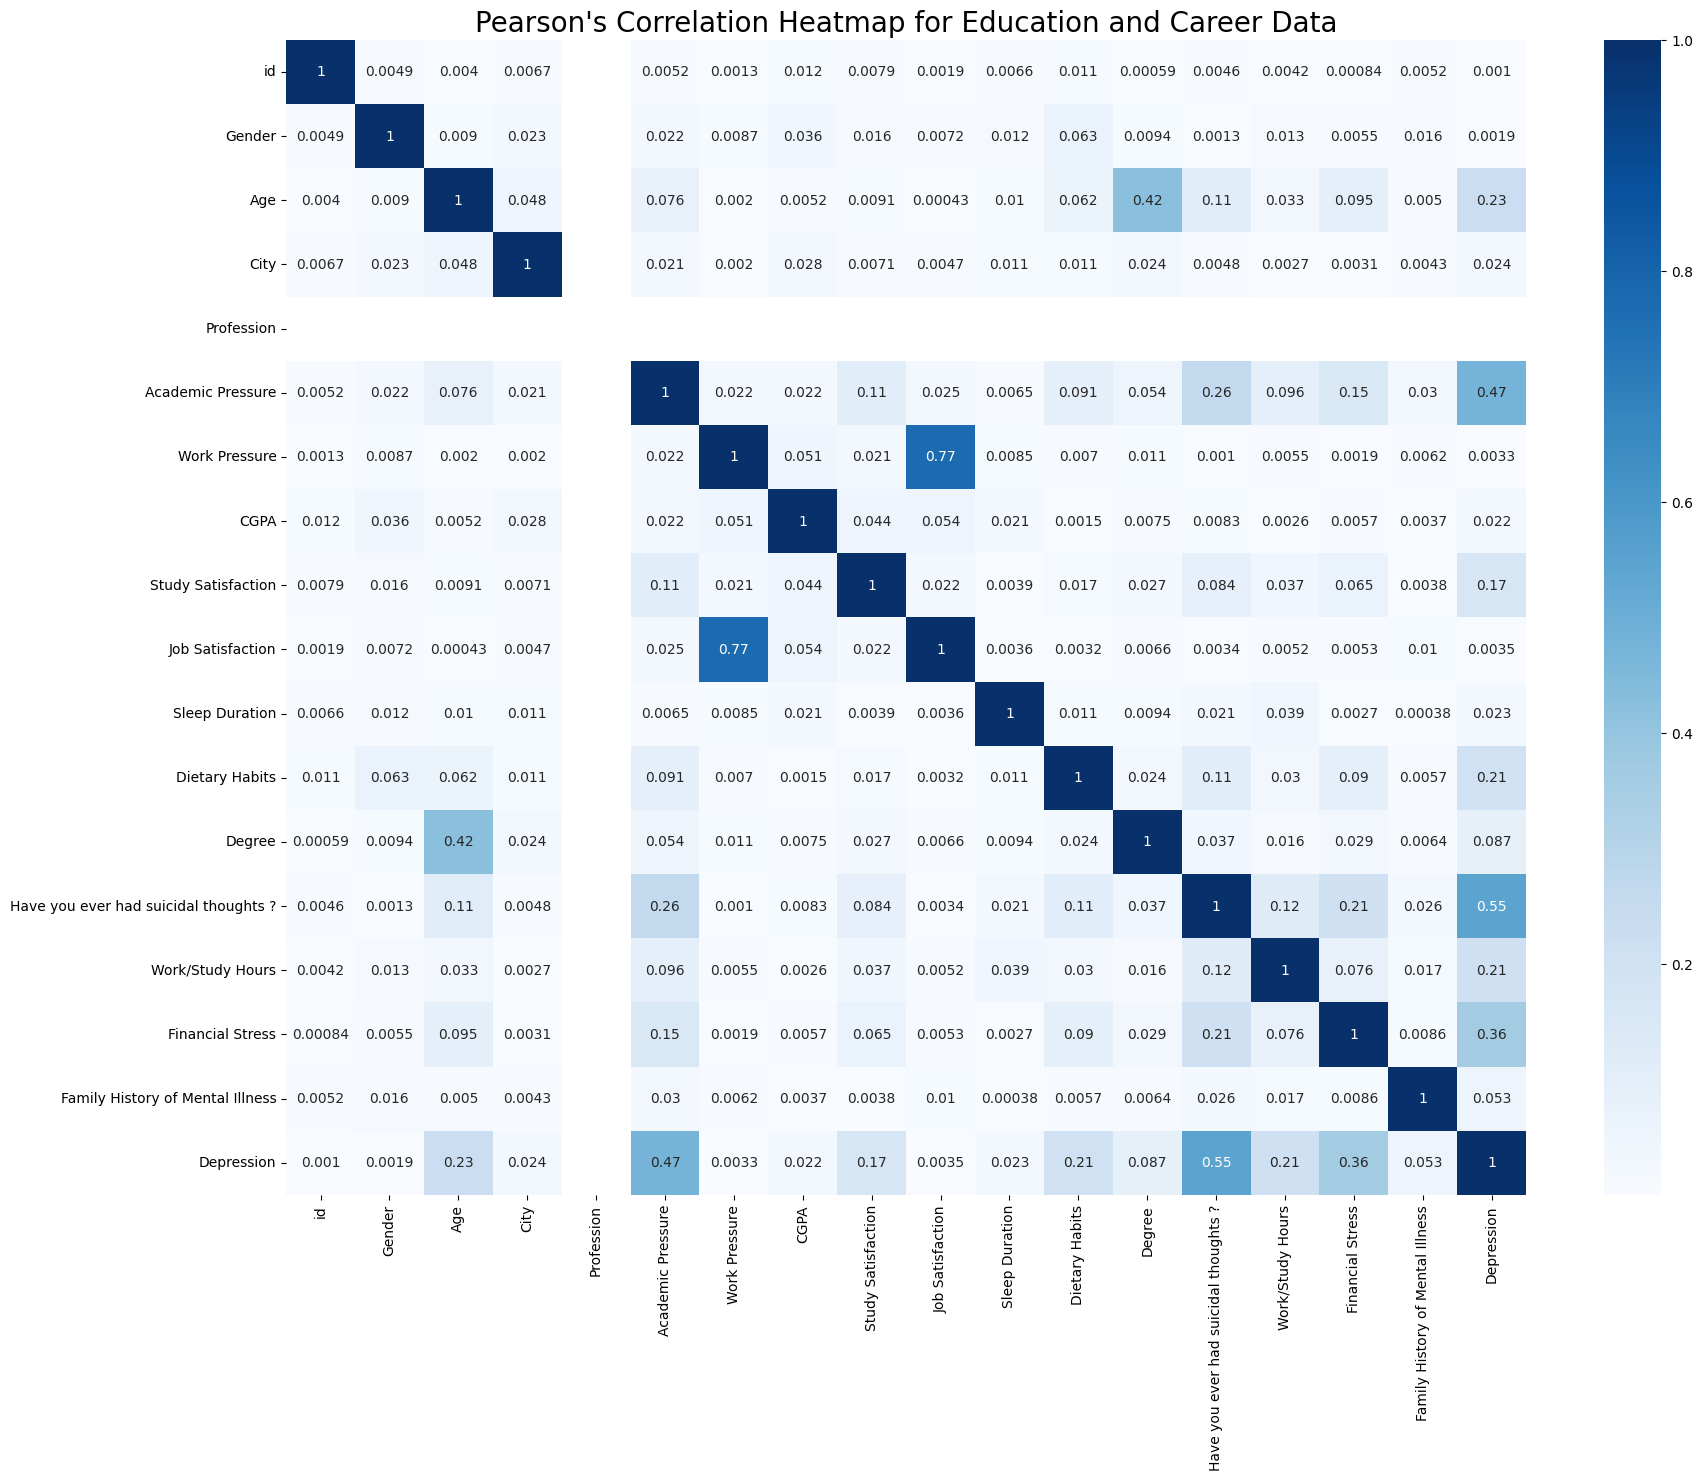

In [ ]:
# Calculate Pearson's correlation matrix
corr_mat = abs(edu_df.corr())
# Menghitung matriks korelasi Pearson dari dataframe "edu_df"
# setelah transformasi variabel kategorikal menjadi labeled encoder.
# Fungsi "corr()" digunakan untuk menghitung korelasi antar kolom-kolom numerik dalam dataframe. Fungsi "abs()" digunakan untuk mengambil nilai absolut dari matriks korelasi sehingga kita mendapatkan korelasi positif tanpa memperhatikan arah hubungan linear.

# Create heatmap
fig, ax = plt.subplots(figsize=(20,15)) # Membuat objek figure dan axis dengan ukuran (12,8) untuk menampung heatmap.
sns.heatmap(corr_mat, annot=True, cmap='Blues')
# Membuat heatmap menggunakan seaborn. Argumen "corr_mat" adalah matriks korelasi yang ingin divisualisasikan.
# Argumen "annot=True" digunakan untuk menampilkan angka korelasi di dalam setiap sel heatmap.
# Argumen "cmap='Blues'" digunakan untuk mengatur skema warna heatmap.
plt.title("Pearson's Correlation Heatmap for Education and Career Data", fontsize=20) # Menambahkan judul pada heatmap.
plt.show() # Menampilkan plot heatmap.

In [3]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 15)) # Membuat objek plot dengan ukuran (12, 8) untuk menampung heatmap.
sns.heatmap(corr_mat[(corr_mat > 0.2) & (corr_mat < 1)], annot=True, cmap='Blues')
# Membuat heatmap menggunakan seaborn. Argumen pertama adalah subset dari matriks korelasi "corr_mat" yang memenuhi kondisi (corr_mat > 0.3) & (corr_mat < 1).
# Kondisi tersebut digunakan untuk memfilter hanya korelasi yang memiliki nilai di antara 0.3 dan 1 yang akan ditampilkan dalam heatmap.
# Argumen "annot=True" digunakan untuk menampilkan angka korelasi di dalam setiap sel heatmap.
# Argumen "cmap='Blues'" digunakan untuk mengatur skema warna heatmap.
plt.title('Features Moderately Correlated with Career Succsees', size=20) # Menambahkan judul pada heatmap.
plt.show() # Menampilkan plot heatmap.

NameError: name 'corr_mat' is not defined

<Figure size 2000x1500 with 0 Axes>

## **b. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

## **c. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.